**Task - 01**

 1. Import the necessary Python libraries for K-Means clustering

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

 2. Load a dataset using pandas and display its first five rows

In [3]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

 3. Select the relevant features for clustering

In [6]:
features = df[['sepal length (cm)', 'sepal width (cm)']]

 4. Visualize the dataset using a scatter plot

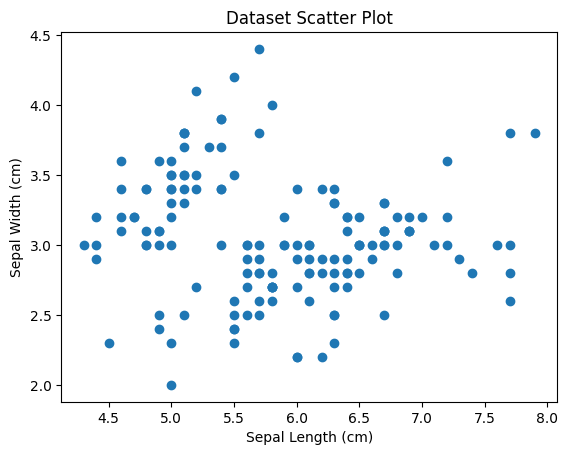

In [7]:
plt.scatter(features['sepal length (cm)'], features['sepal width (cm)'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Dataset Scatter Plot')
plt.show()

5. Create and fit a K-Means clustering model with a chosen number of clusters

In [8]:
kmeans = KMeans(n_clusters=3, random_state = 42)
kmeans.fit(features)

KMeans(n_clusters=3, random_state=42)

6. Retrieve the cluster labels assigned to each data point

In [10]:
labels = kmeans.labels_
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]


 7. Add these cluster labels as a new column to the dataset

In [11]:
df['cluster'] = labels
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   cluster  
0        2  
1        2  
2        2  
3        2  
4        2

 8. Visualize the clusters and their centroids using a scatter plot

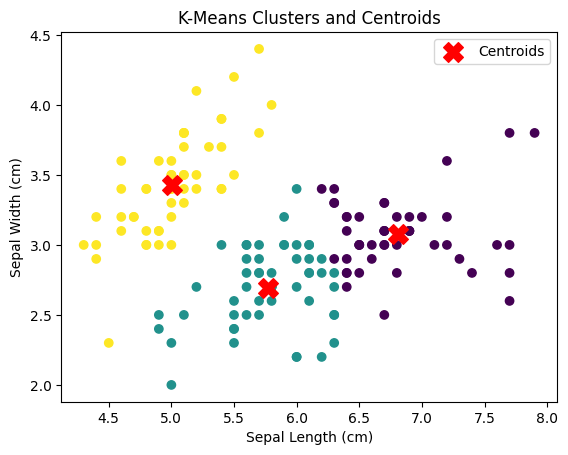

In [12]:
plt.scatter(features['sepal length (cm)'], features['sepal width (cm)'], c=labels, cmap = 'viridis')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'X', s = 200, c = 'red', label = 'Centroids')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-Means Clusters and Centroids')
plt.legend()
plt.show()

9. Calculate the Within-Cluster Sum of Squares (WCSS) for different
 numbers of clusters

In [13]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, random_state = 42)
  kmeans.fit(features)
  wcss.append(kmeans.inertia_)
print(wcss)

[130.4752666666667, 58.44759246088194, 37.0507021276596, 28.41365317351379, 26.9325075582776, 17.463509575220108, 14.828543464836567, 12.843135057471263, 12.530893304970899, 9.854376984126986]


 10. Use the Elbow Method to determine the optimal number of clusters

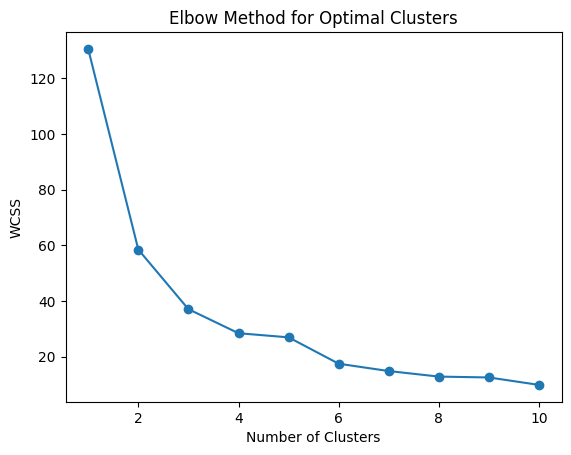

In [14]:
plt.plot(range(1, 11), wcss, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

 11. Re-train the K-Means model with the optimal number of clusters and
 plot the final clusters

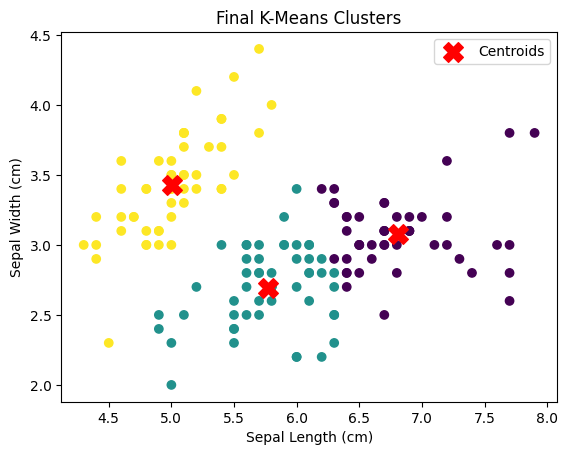

In [16]:
optimal_k = 3
kmeans_optimal = KMeans(n_clusters = optimal_k, random_state = 42)
kmeans_optimal.fit(features)
labels_optimal = kmeans_optimal.labels_
df['optimal_cluster'] = labels_optimal

plt.scatter(features['sepal length (cm)'], features['sepal width (cm)'], c = labels_optimal, cmap = 'viridis')
centroids_optimal = kmeans_optimal.cluster_centers_
plt.scatter(centroids_optimal[:, 0], centroids_optimal[:, 1], marker = 'X', s = 200, c = 'red', label = 'Centroids')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Final K-Means Clusters')
plt.legend()
plt.show()

**Task - 02**

12. Import the required Python libraries for hierarchical clustering and visu
alization

In [17]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

13. Load the dataset using pandas and display its first few rows

In [23]:
data = load_iris()
df.head(8)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   

   cluster  optimal_cluster  
0        2                2  
1        2                2  
2        2                2  
3        2                2  
4        2                2  
5        2                2  
6        2                2  
7        2                2

 14. Select the relevant features for clustering

In [21]:
features = df[['sepal length (cm)', 'sepal width (cm)']]

15. Plot a dendrogram to visualize the hierarchical clustering process

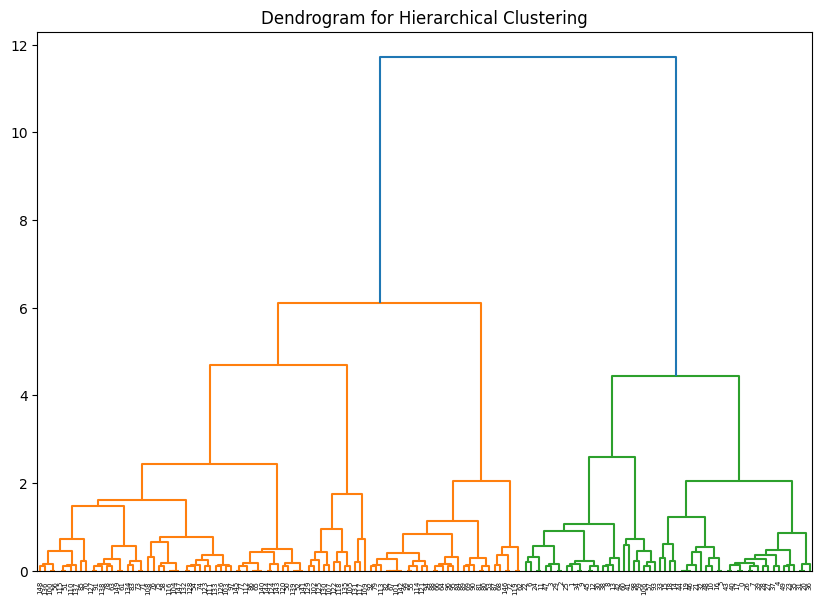

In [22]:
linked = linkage(features, method = 'ward')
plt.figure(figsize = (10, 7))
dendrogram(linked, orientation = 'top', distance_sort = 'descending', show_leaf_counts = True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

16. Perform Agglomerative Hierarchical Clustering with a chosen number of
 clusters

In [24]:
hc = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')
hc.fit_predict(features)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 1, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0])

17. Retrieve the cluster labels assigned to each data point

In [29]:
hc_labels = kmeans.labels_
print(labels)

[7 1 1 1 7 4 1 7 1 1 4 1 1 1 4 4 4 7 4 7 7 7 1 7 1 1 7 7 7 1 1 7 4 4 1 1 7
 7 1 7 7 6 1 7 7 1 7 1 7 7 9 0 9 3 5 3 0 6 9 6 6 5 3 5 3 9 3 3 5 3 0 5 5 5
 5 9 9 9 5 3 3 3 3 5 3 0 9 5 3 3 3 5 3 6 3 3 3 5 6 3 0 3 2 5 9 2 6 2 9 8 0
 5 9 3 3 0 9 8 2 3 9 3 2 5 9 2 5 5 5 2 2 8 5 5 5 2 0 0 5 9 9 9 3 9 9 9 5 9
 0 5]


18. Add the hierarchical cluster labels as a new column to the dataset

In [30]:
df['Cluster'] = hc_labels
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   cluster  optimal_cluster  Cluster  
0        2                2        7  
1        2                2        1  
2        2                2        1  
3        2                2        1  
4        2                2        7

 19. Visualize the resulting clusters with different colors on a scatter plot

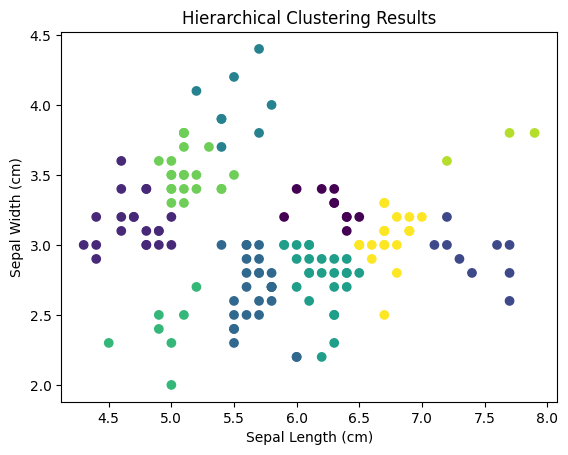

In [31]:
plt.scatter(features['sepal length (cm)'], features['sepal width (cm)'], c = hc_labels, cmap = 'viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Hierarchical Clustering Results')
plt.show()

20. Compare the clusters obtained from hierarchical clustering with those
 from K-Means

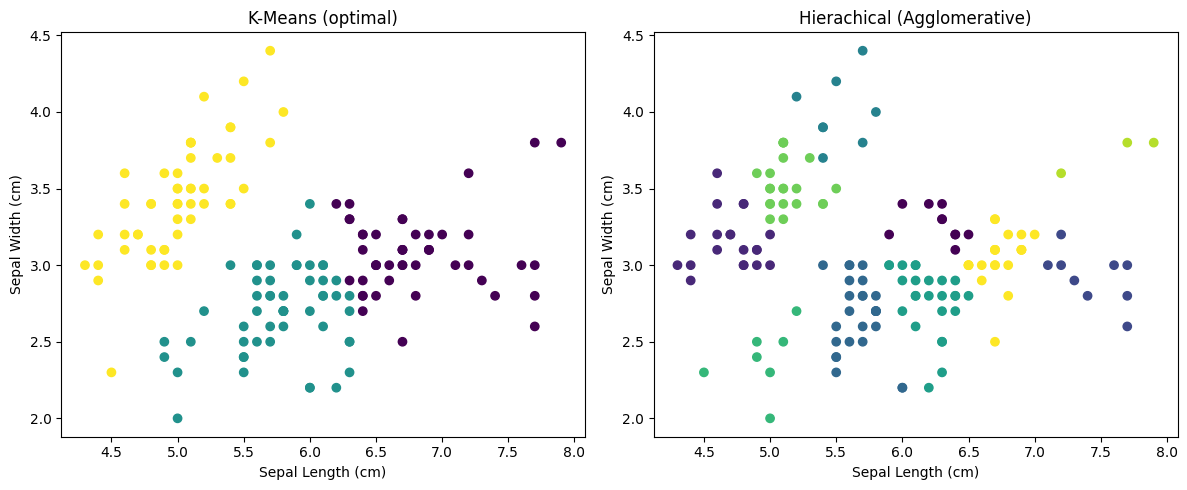

In [34]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.scatter(features['sepal length (cm)'], features['sepal width (cm)'], c = labels_optimal, cmap = 'viridis')
plt.title('K-Means (optimal)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

plt.subplot(1, 2, 2)
plt.scatter(features['sepal length (cm)'], features['sepal width (cm)'], c = hc_labels, cmap = 'viridis')
plt.title('Hierachical (Agglomerative)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

plt.tight_layout()
plt.show()